### 使用自己生成的假数据、华为原版数据、PeMS数据进行车流量预测（测试所用的PeMS数据仅包含3天的内容，若需完整30天数据集，还需继续使用Load_txt_files生成数据。）

In [1]:
'''导入包'''
from sklearn.preprocessing import MinMaxScaler # 数据归一化
import matplotlib.pyplot as plt # 绘图
import numpy as np # 科学计算
import pandas as pd # 表格数据处理
import math # 数学
import time #程序运行时间

### 1.假数据生成测试

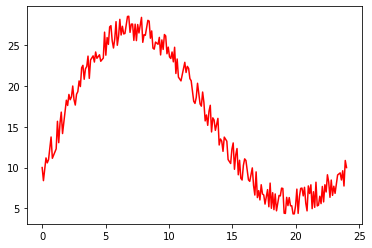

In [2]:
'''简单三角函数曲线，并绘制函数图像'''
x = np.linspace(0,24,240)
y = list()
for i in x:
    y.append((np.sin(i*math.pi*2/24) + (np.sin(i*math.pi/24)+1)) * 10 + np.random.randint(-2,2))

plt.plot(x,y,color = 'red')
plt.show()

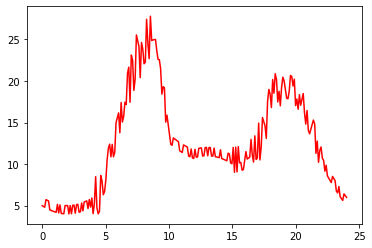

In [3]:
'''使用分段函数曲线，模拟早高峰、晚高峰，并绘制图像'''
x = np.linspace(0,24,240)
y = list()
for i in x:
    if i < 4:
        y.append( ( ( i - 2 ) / 2 ) ** 2 + 5 + np.random.randint(-1,1))
    elif i < 7:
        y.append( ( i - 3 ) ** 2 + 5 + np.random.randint(-3,3))
    elif i < 9:
        y.append( -1 *(  i - 9 ) ** 2 + 20 + 5 + np.random.randint(-4,4))
    elif i < 10:
        y.append(  -1 *(  i - 4 ) ** 2  + 45 + 5 + np.random.randint(-2,2))
    elif i < 12:
        y.append( ( (  i - 14 ) / 2.5)  ** 2 + 6 + 5 + np.random.randint(-1,1))
    elif i <15:
        y.append( -1 *( ( i - 13 ) / 2 ) ** 2 + 7 + 5 + np.random.randint(-1,1))
    elif i < 17:
        y.append( ( ( i - 15 ) / 1.5 ) ** 2 + 6 + 5 + np.random.randint(-2,2)) 
    elif i < 19:
        y.append( -1 *( ( i -20) ** 2 ) + 16.5 + 5 + np.random.randint(-3,3))
    elif i < 22:
        y.append( -1 *(( i - 19 ) ** 2) + 15 + 5 + np.random.randint(-2,2))
    elif i <= 24:
        y.append( ( ( i - 28 ) / 2 ) ** 2 - 3  + 5 + np.random.randint(-1,1))

plt.plot(x,y,color = 'red')
plt.show()

In [4]:
'''测试单日数据生成形状'''
time_list = list()
for day in range(1):
    for hr in range(24):
        for minutes in range(0,60,6):
            time_list.append(str(day)+'_'+str(hr)+'_'+str(minutes))
time_list = np.array(time_list)
print(time_list.shape)

(240,)


### 2.使用假数据进行模型预测

In [5]:
'''模拟真实数据，生成30天的数据'''
# 本数据以6分钟为间隔，一小时10条，一天240条
X = list()
Y = list()
#
start = time.process_time ()
#
for day in range(30):
    x = np.linspace(0,24,240)
#     for i in x:
#         X.append(round((np.sin(i*math.pi*2/24) + (np.sin(i*math.pi/24)+1)) * 10 + np.random.randint(-2,2), 0))
    for i in x:
        if i < 4:
            X.append(int( ( ( i - 2 ) / 2 ) ** 2 + 5 + np.random.randint(-1,1)))
        elif i < 7:
            X.append(int( ( i - 3 ) ** 2 + 5 + np.random.randint(-3,3)))
        elif i < 9:
            X.append(int( -1 *(  i - 9 ) ** 2 + 20 + 5 + np.random.randint(-4,4)))
        elif i < 10:
            X.append(int(  -1 *(  i - 4 ) ** 2  + 45 + 5 + np.random.randint(-2,2)))
        elif i < 12:
            X.append(int( ( (  i - 14 ) / 2.5)  ** 2 + 6 + 5 + np.random.randint(-1,1)))
        elif i <15:
            X.append(int( -1 *( ( i - 13 ) / 2 ) ** 2 + 7 + 5 + np.random.randint(-1,1)))
        elif i < 17:
            X.append(int( ( ( i - 15 ) / 1.5 ) ** 2 + 6 + 5 + np.random.randint(-2,2)) )
        elif i < 19:
            X.append(int( -1 *( ( i -20) ** 2 ) + 16.5 + 5 + np.random.randint(-3,3)))
        elif i < 22:
            X.append(int( -1 *(( i - 19 ) ** 2) + 15 + 5 + np.random.randint(-2,2)))
        elif i <= 24:
            X.append(int( ( ( i - 28 ) / 2 ) ** 2 - 3  + 5 + np.random.randint(-1,1)))
for day in range(30):
    for hr in range(24):
        for minutes in range(0,60,6):
            Y.append(str(day)+'_'+str(hr)+'_'+str(minutes)) 

end = time.process_time ()
print('生成耗时：', round(end-start, 5), '秒')

生成耗时： 0.08401 秒


In [6]:
'''将数据传入pandas，并查看数据'''
df = pd.DataFrame(data={'time':Y, 'Veh/5 Minutes':X})
df.head()

,time,Veh/5 Minutes
0,0_0_0,5
1,0_0_6,4
2,0_0_12,4
3,0_0_18,5
4,0_0_24,5


In [7]:
'''查看数据统计信息'''
df.describe()

,Veh/5 Minutes
count,7200.000000
mean,11.891111
std,5.697137
min,3.000000
25%,8.000000
50%,11.000000
75%,16.000000
max,27.000000


In [8]:
'''将数据转为array，并将时间戳与车数分离'''
df_array=df.values
data = df_array[:, 1]
print(data.shape)

(7200,)


In [9]:
'''将数据归一化到0-1之间，并检查数据'''
scaler = MinMaxScaler(feature_range=(0, 1))
data = np.reshape(data,(-1,1))
data = scaler.fit_transform(data)
print(data[:5])

[[0.08333333]
 [0.04166667]
 [0.04166667]
 [0.08333333]
 [0.08333333]]


In [10]:
'''取前25天的数据为训练集，后5天为测试集'''
trainarray = data[:240*25] # 6分钟1条，1小时10条，1天240条，共计25天
testarray = data[240*25:]

In [11]:
'''
LSTM需要输入带有时序信息的数据，例如在本案例中，要使用：
    1、2、3、4、5、6点的数据来预测7点的数据
    2、3、4、5、6、7 ———> 8
    3、4、5、6、7、8 ———> 9
    4、5、6、7、8、9 ———> 10
'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [12]:
'''按一次输入10个时间步为标准生成数据，并检查数据形状'''
look_back = 10
X_train, y_train  = create_dataset(trainarray, look_back)
X_test, y_test = create_dataset(testarray, look_back)
print(X_train.shape)
print(y_train.shape)

(5989, 10, 1)
(5989, 1)


In [13]:
'''导入包'''
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

/Users/yangqihong/anaconda2/envs/new_python36_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yangqihong/anaconda2/envs/new_python36_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yangqihong/anaconda2/envs/new_python36_environment/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q

In [14]:
'''搭建基于LSTM的模型'''
# from tensorflow.keras import optimizers
def LSTM_Model(units):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    lstm_model.add(LSTM(units[2]))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(units[3], activation='sigmoid'))
#     rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-06)
    lstm_model.compile(loss='mse', optimizer='rmsprop', metrics=['mape']) 
    return lstm_model

'''搭建基于GRU的模型'''
def GRU_Model(units):
    gru_model = Sequential()
    gru_model.add(GRU(units[1], input_shape=(units[0], 1), return_sequences=True))
    gru_model.add(GRU(units[2]))
    gru_model.add(Dropout(0.2))
    gru_model.add(Dense(units[3], activation='sigmoid'))
    gru_model.compile(loss='mse', optimizer='rmsprop', metrics=['mape'])
    return gru_model

In [15]:
'''定义绘制三张图函数(3天的流量)'''
def PLT_Figure_3Day(predict, gtrue, index):
    # index为单日的数据量，例如自己生成的数据单日240条，真实数据单日288条（每小时12条 * 24小时）
    plt.figure(figsize=(6,6),dpi=80)
    # 创建画板
    plt.figure(1)
    ax1 = plt.subplot(311)

    plt.plot(predict[:index],color='green')
    plt.plot(gtrue[:index],color='red')

    ax2 = plt.subplot(312)
    plt.plot(predict[index : index * 2],color='green')
    plt.plot(gtrue[index : index * 2],color='red')

    ax3 = plt.subplot(313)
    plt.plot(predict[index * 2 : index * 3],color='green')
    plt.plot(gtrue[index * 2 : index * 3],color='red')
    # 
    plt.tight_layout()
    plt.show()

In [16]:
'''确定模型参数'''
config = {'batch': 256, 'epochs': 10}
units = [10, 64, 128, 1]

In [17]:
'''进行lstm模型训练'''
lstm_model_1 = LSTM_Model(units)
lstm_model_1.fit(X_train, y_train,
                 batch_size=config['batch'], epochs=config['epochs'],
                 validation_split=0.05)

Train on 5689 samples, validate on 300 samples
Epoch 1/10
5689/5689 [==============================] - 2s 366us/step - loss: 0.0278 - mean_absolute_percentage_error: 580856.5045 - val_loss: 0.0146 - val_mean_absolute_percentage_error: 52.8360
Epoch 2/10
5689/5689 [==============================] - 1s 155us/step - loss: 0.0129 - mean_absolute_percentage_error: 209141.9576 - val_loss: 0.0155 - val_mean_absolute_percentage_error: 51.6383
Epoch 3/10
5689/5689 [==============================] - 1s 156us/step - loss: 0.0124 - mean_absolute_percentage_error: 193091.4894 - val_loss: 0.0118 - val_mean_absolute_percentage_error: 24.8080
Epoch 4/10
5689/5689 [==============================] - 1s 155us/step - loss: 0.0111 - mean_absolute_percentage_error: 226670.2592 - val_loss: 0.0169 - val_mean_absolute_percentage_error: 58.0127
Epoch 5/10
5689/5689 [==============================] - 1s 155us/step - loss: 0.0096 - mean_absolute_percentage_error: 194135.9399 - val_loss: 0.0081 - val_mean_absolute

In [18]:
'''进行模型预测，并对数据进行反归一化'''
predicted = lstm_model_1.predict(X_test)

predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

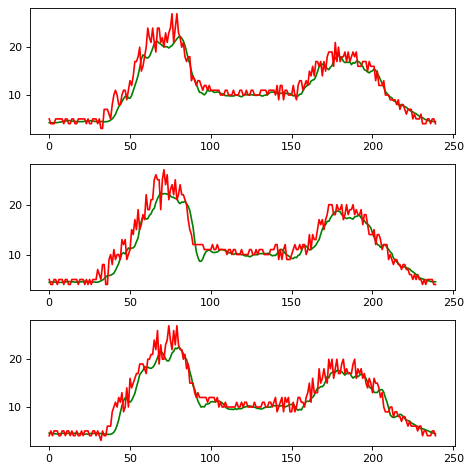

In [19]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 240)

In [20]:
'''进行gru模型训练'''
gru_model_1 = GRU_Model(units)
gru_model_1.fit(X_train, y_train,
                 batch_size=config['batch'], epochs=config['epochs'],
                 validation_split=0.05)

Train on 5689 samples, validate on 300 samples
Epoch 1/10
5689/5689 [==============================] - 2s 343us/step - loss: 0.0258 - mean_absolute_percentage_error: 547187.1749 - val_loss: 0.0145 - val_mean_absolute_percentage_error: 52.6400
Epoch 2/10
5689/5689 [==============================] - 1s 138us/step - loss: 0.0100 - mean_absolute_percentage_error: 226884.7732 - val_loss: 0.0113 - val_mean_absolute_percentage_error: 36.8408
Epoch 3/10
5689/5689 [==============================] - 1s 136us/step - loss: 0.0084 - mean_absolute_percentage_error: 207732.7482 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 42.2661
Epoch 4/10
5689/5689 [==============================] - 1s 137us/step - loss: 0.0072 - mean_absolute_percentage_error: 204290.9678 - val_loss: 0.0110 - val_mean_absolute_percentage_error: 48.3099
Epoch 5/10
5689/5689 [==============================] - 1s 137us/step - loss: 0.0064 - mean_absolute_percentage_error: 199720.9924 - val_loss: 0.0046 - val_mean_absolute

In [21]:
'''进行模型预测，并对数据进行反归一化'''
predicted = gru_model_1.predict(X_test)

predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

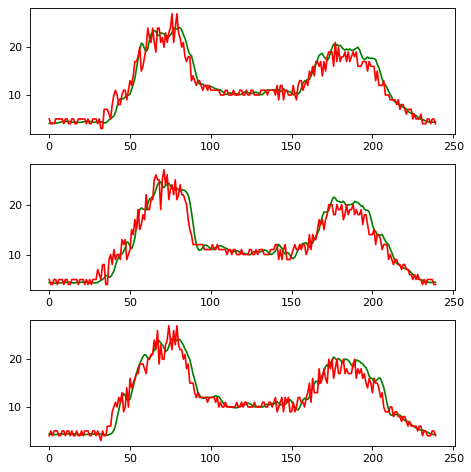

In [22]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 240)

### 3.使用华为数据进行模型训练

In [23]:
'''导入数据并展示'''
HUAWEI = pd.read_csv('train.csv')
HUAWEI.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed
0,04/01/2016 0:00,12,1,100
1,04/01/2016 0:05,13,1,100
2,04/01/2016 0:10,11,1,100
3,04/01/2016 0:15,13,1,100
4,04/01/2016 0:20,10,1,100


In [24]:
'''将DataFrame转为矩阵，并选取车流量数据列'''
HUAWEI_array=HUAWEI.values
HUAWEI_data = HUAWEI_array[:, 1]

In [25]:
'''进行数据归一化'''
scaler = MinMaxScaler(feature_range=(0, 1))
HUAWEI_data = np.reshape(HUAWEI_data,(-1,1))
HUAWEI_data = scaler.fit_transform(HUAWEI_data)
print(HUAWEI_data[:5])

[[0.06091371]
 [0.06598985]
 [0.05583756]
 [0.06598985]
 [0.05076142]]


In [26]:
'''选取前22天数据为训练集，剩下的为测试集'''
train = HUAWEI_data[:22*12*24] # 5分钟1条，1小时12条，1天288条，共计22天
test = HUAWEI_data[22*12*24:]

In [27]:
'''按保留10个时间步来生成数据'''
look_back = 10
X_train, y_train  = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(y_train.shape)

(6325, 10, 1)
(6325, 1)


In [28]:
'''使用lstm模型进行训练'''
lstm_model_2 = LSTM_Model(units)
lstm_model_2.fit(X_train, y_train,
                 batch_size=config["batch"], epochs=config["epochs"],
                 validation_split=0.05)

Train on 6008 samples, validate on 317 samples
Epoch 1/10
6008/6008 [==============================] - 2s 403us/step - loss: 0.0237 - mean_absolute_percentage_error: 76881.0697 - val_loss: 0.0091 - val_mean_absolute_percentage_error: 75.7652
Epoch 2/10
6008/6008 [==============================] - 1s 156us/step - loss: 0.0094 - mean_absolute_percentage_error: 36425.0490 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 55.2900
Epoch 3/10
6008/6008 [==============================] - 1s 156us/step - loss: 0.0085 - mean_absolute_percentage_error: 33593.3329 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 24.5614
Epoch 4/10
6008/6008 [==============================] - 1s 156us/step - loss: 0.0081 - mean_absolute_percentage_error: 36827.4948 - val_loss: 0.0073 - val_mean_absolute_percentage_error: 60.8208
Epoch 5/10
6008/6008 [==============================] - 1s 155us/step - loss: 0.0075 - mean_absolute_percentage_error: 19929.9087 - val_loss: 0.0066 - val_mean_absolute_perc

In [29]:
'''进行模型预测，并对数据进行反归一化'''
predicted = lstm_model_2.predict(X_test)

predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

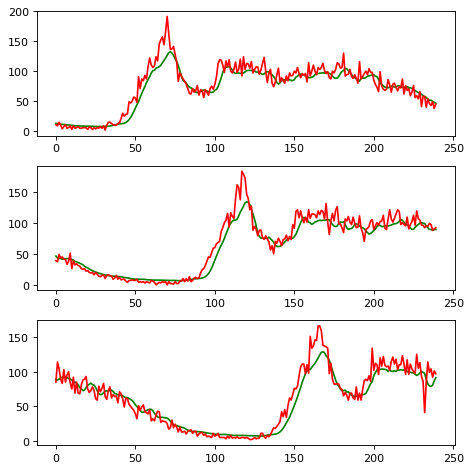

In [30]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 240)

In [31]:
'''进行gru模型训练'''
gru_model_2 = GRU_Model(units)
gru_model_2.fit(X_train, y_train,
                 batch_size=config['batch'], epochs=config['epochs'],
                 validation_split=0.05)

Train on 6008 samples, validate on 317 samples
Epoch 1/10
6008/6008 [==============================] - 2s 378us/step - loss: 0.0227 - mean_absolute_percentage_error: 48254.7193 - val_loss: 0.0070 - val_mean_absolute_percentage_error: 43.5680
Epoch 2/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0076 - mean_absolute_percentage_error: 53929.1283 - val_loss: 0.0067 - val_mean_absolute_percentage_error: 23.1977
Epoch 3/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0070 - mean_absolute_percentage_error: 29381.9732 - val_loss: 0.0053 - val_mean_absolute_percentage_error: 33.5938
Epoch 4/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0061 - mean_absolute_percentage_error: 44244.6609 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 23.0101
Epoch 5/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0050 - mean_absolute_percentage_error: 32833.2706 - val_loss: 0.0044 - val_mean_absolute_perc

In [32]:
'''进行模型预测，并对数据进行反归一化'''
predicted = gru_model_2.predict(X_test)

predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

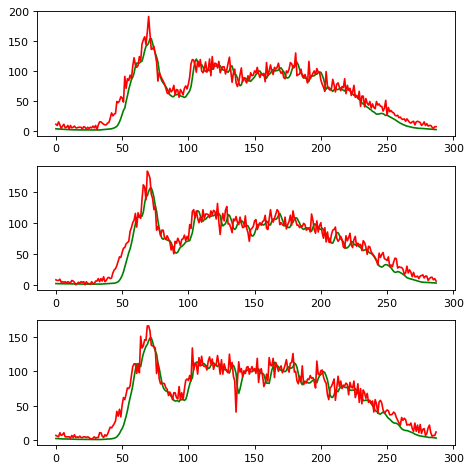

In [33]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 288)

### 4.使用PeMS数据进行模型训练

In [34]:
'''导入之前生成的PeMS数据'''
PeMS = pd.read_csv('3013051.csv')
PeMS.head()

,time,station,Total_Flow
0,01/01/2020 00:00:00,3013051,0
1,01/01/2020 00:05:00,3013051,2
2,01/01/2020 00:10:00,3013051,13
3,01/01/2020 00:15:00,3013051,9
4,01/01/2020 00:20:00,3013051,11


In [35]:
PeMS1 = PeMS.fillna(value=0)

In [36]:
'''将数据转为矩阵，提取车流量列信息'''
PeMS_array=PeMS1.values
PeMS_array = PeMS_array[:, 2]

In [37]:
'''归一化'''
scaler = MinMaxScaler(feature_range=(0, 1))
PeMS_array = np.reshape(PeMS_array,(-1,1))
PeMS_array = scaler.fit_transform(PeMS_array)
print(PeMS_array[:5])

[[0.        ]
 [0.02439024]
 [0.15853659]
 [0.1097561 ]
 [0.13414634]]


In [38]:
'''切分训练集和测试集'''
train = PeMS_array[:22*12*24]
test = PeMS_array[22*12*24:]

In [39]:
'''时间步设为10'''
look_back = 10
X_train, y_train  = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(y_train.shape)

(6325, 10, 1)
(6325, 1)


In [40]:
'''使用lstm模型进行训练'''
lstm_model_3 = LSTM_Model(units)
lstm_model_3.fit(X_train, y_train,
                     batch_size=config["batch"], epochs=config["epochs"],
                     validation_split=0.05)

Train on 6008 samples, validate on 317 samples
Epoch 1/10
6008/6008 [==============================] - 3s 463us/step - loss: 0.0242 - mean_absolute_percentage_error: 4058468.4777 - val_loss: 0.0117 - val_mean_absolute_percentage_error: 1676639.0815
Epoch 2/10
6008/6008 [==============================] - 1s 157us/step - loss: 0.0109 - mean_absolute_percentage_error: 2348731.3580 - val_loss: 0.0102 - val_mean_absolute_percentage_error: 1111393.5036
Epoch 3/10
6008/6008 [==============================] - 1s 157us/step - loss: 0.0106 - mean_absolute_percentage_error: 2119117.5248 - val_loss: 0.0098 - val_mean_absolute_percentage_error: 1081246.3916
Epoch 4/10
6008/6008 [==============================] - 1s 157us/step - loss: 0.0097 - mean_absolute_percentage_error: 1882669.5124 - val_loss: 0.0101 - val_mean_absolute_percentage_error: 573225.8259
Epoch 5/10
6008/6008 [==============================] - 1s 153us/step - loss: 0.0095 - mean_absolute_percentage_error: 1822386.8549 - val_loss: 0.

In [41]:
'''进行模型预测，并对数据进行反归一化'''
predicted = lstm_model_3.predict(X_test)
print(predicted.shape)
predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

(2581, 1)


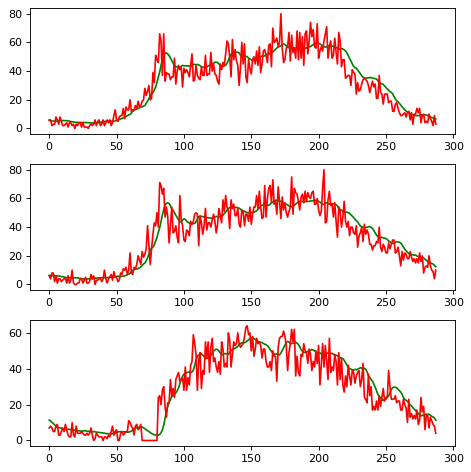

In [42]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 288)

In [43]:
'''进行gru模型训练'''
gru_model_3 = GRU_Model(units)
gru_model_3.fit(X_train, y_train,
                 batch_size=config["batch"], epochs=config['epochs'],
                 validation_split=0.05)

Train on 6008 samples, validate on 317 samples
Epoch 1/10
6008/6008 [==============================] - 3s 429us/step - loss: 0.0277 - mean_absolute_percentage_error: 5026042.0165 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 1577070.3052
Epoch 2/10
6008/6008 [==============================] - 1s 138us/step - loss: 0.0095 - mean_absolute_percentage_error: 2248664.2923 - val_loss: 0.0099 - val_mean_absolute_percentage_error: 1429687.9690
Epoch 3/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0089 - mean_absolute_percentage_error: 2061956.0761 - val_loss: 0.0086 - val_mean_absolute_percentage_error: 1068673.2120
Epoch 4/10
6008/6008 [==============================] - 1s 136us/step - loss: 0.0089 - mean_absolute_percentage_error: 1887973.0018 - val_loss: 0.0106 - val_mean_absolute_percentage_error: 1458896.8515
Epoch 5/10
6008/6008 [==============================] - 1s 137us/step - loss: 0.0084 - mean_absolute_percentage_error: 1867753.0434 - val_loss: 0

In [44]:
'''进行模型预测，并对数据进行反归一化'''
predicted = gru_model_3.predict(X_test)

predicted_trans = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_test_trans = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

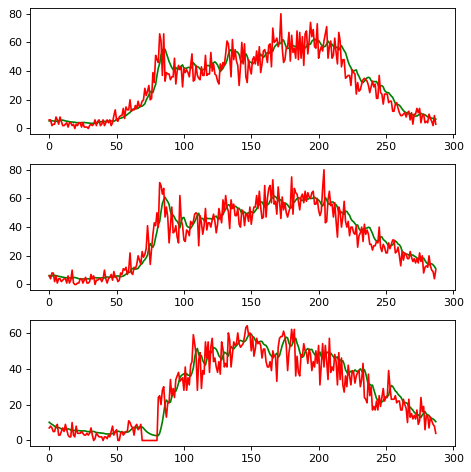

In [45]:
'''绘制预测图像'''
PLT_Figure_3Day(predicted_trans, y_test_trans, 288)